In [1]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library

In [24]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('NEWS*.txt')
file2_list = glob('a*.txt')
type(file_list)
file2_list

['a.txt']

In [3]:
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
for file in file_list:
    with open(file ,'r') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [4]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [5]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.cache
Loading model cost 0.711 seconds.
Prefix dict has been built succesfully.
D:\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,,,&,(,),+,",",-,.,.%,...,Ｉ,Ｋ,Ｍ,Ｐ,Ｒ,Ｓ,Ｔ,Ｙ,＼,～
0,603.0,326.0,2.0,41.0,41.0,1.0,24.0,57.0,48.0,1.0,...,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,33.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,524.0,353.0,3.0,68.0,66.0,1.0,19.0,33.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
4,43.0,47.0,0.0,6.0,6.0,0.0,8.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5,492.0,423.0,1.0,32.0,32.0,2.0,18.0,28.0,4.0,0.0,...,0.0,2.0,0.0,3.0,0.0,3.0,0.0,2.0,0.0,19.0
6,62.0,52.0,0.0,3.0,3.0,0.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,69.0,93.0,0.0,13.0,13.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,59.0,60.0,1.0,8.0,8.0,0.0,5.0,10.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#去除標點符號(觀察表格中標點符號位置)
df_drop = df.drop(df.columns.tolist()[0:1602]+df.columns.tolist()[8400:10405],axis=1)
df_drop

,他將,付出,代工,代理,代理商,代表,代表人,代表作,代表性,令,...,關國,關外,關將,關心,關愛,關懷,關懷花,關時,關注,關聯
0,1.0,1.0,3.0,2.0,9.0,8.0,0.0,0.0,1.0,2.0,...,0.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,1.0,22.0,5.0,1.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6,0.0,0.0,1.0,1.0,5.0,2.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
df = df_tfidf
df
#把TF-IDF後的詞組中頻率過低的詞組刪除
#df1 = df_tfidf[df_tfidf>0.001].dropna(axis=1)
#df1

,他將,付出,代工,代理,代理商,代表,代表人,代表作,代表性,令,...,關國,關外,關將,關心,關愛,關懷,關懷花,關時,關注,關聯
0,0.003783,0.003783,0.007080,0.006517,0.023898,0.018880,0.000000,0.000000,0.003783,0.006517,...,0.000000,0.003783,0.003783,0.007566,0.003488,0.007566,0.003783,0.003488,0.002776,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.010872,0.000000,0.003058,0.010872,0.000000,0.004357,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006394,0.004357
4,0.000000,0.000000,0.000000,0.000000,0.022947,0.000000,0.000000,0.000000,0.000000,0.028161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.002379,0.003285,0.058888,0.011895,0.004233,0.000000,0.000000,0.006570,...,0.004233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008396,0.000000
6,0.000000,0.000000,0.015082,0.020825,0.084847,0.030165,0.000000,0.000000,0.024176,0.020825,...,0.000000,0.000000,0.024176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.021189,0.009416,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013916,0.011077,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.019621,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.028996,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
#df1 = df1.drop(df1.columns.tolist()[49:],axis=1)
#df1

In [9]:
#df1.to_csv("Matrix.csv", encoding = 'big5')

In [10]:
#再觀察一次文字雲並手動刪除不適合的資訊
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt
#tfidf_dict = df_tfidf.to_dict(orient='records')
#wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
#wordcloud.fit_words(tfidf_dict[1])
#plt.imshow(wordcloud)
#plt.show()

In [11]:
X = df.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std.shape

(43, 6798)

In [12]:
#from sklearn.decomposition import PCA as sklearnPCA
#sklearn_pca = sklearnPCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(X_std)
#Y_sklearn

In [20]:
pca = PCA(n_components=2)

x_7d = pca.fit_transform(X_std)
x_7d.shape
x_7d

array([[  -3.1104143 ,   70.94736069],
       [  -6.35257076,  -10.00312595],
       [  -5.90196056,   -9.99762448],
       [  -5.73123923,   -8.82097399],
       [  -4.61485374,   -7.23978177],
       [ 240.55737741,   -2.78363193],
       [  -4.30241601,   -1.72352253],
       [  -4.34779579,   21.45793843],
       [  -6.35257076,  -10.00312595],
       [  -5.91344279,    8.47910097],
       [  -5.09309014,  115.27211382],
       [  -3.28854822,  129.02590337],
       [  -5.83341951,   -9.26669283],
       [  -5.85195076,   -9.24521405],
       [  -5.28640118,   -9.32228072],
       [  -5.76277249,   -9.12081336],
       [  -6.35257076,  -10.00312595],
       [  -6.35257076,  -10.00312595],
       [  -4.89577785,   -7.50349979],
       [  -5.90196056,   -9.99762448],
       [  -6.2410771 ,   -9.24256093],
       [  -6.10053774,   -9.95590202],
       [  -6.11625761,   -8.5480131 ],
       [  -6.09356065,  -10.12534758],
       [  -5.83865361,   -9.57215101],
       [  -5.94598309,   

<Figure size 504x504 with 0 Axes>

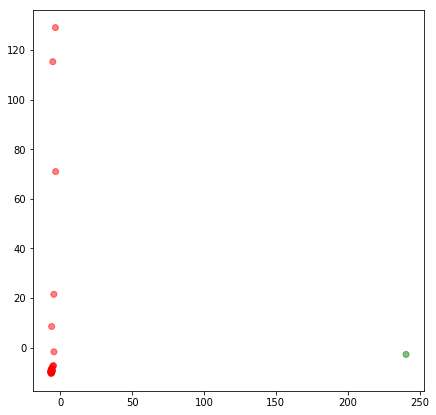

In [22]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 2)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,1], c= label_color, alpha=0.5) 
plt.show()